In [8]:
import tensorflow as tf
import numpy as np

In [9]:
#Haremos que una red neuronal averigue la forma de callular la conversió de grados celsius a fahrenheit
celsius = np.array([-40,-10,0,8,15,22,38],dtype=float)
fahrenheit = np.array([-40,14,32,46,59,72,100],dtype=float)

In [10]:
#keras para simplificar redes neuronales
#CAPA DENSA: conexiones de una neurona a todas las demás
#Solo una neurona y
capa=tf.keras.layers.Dense(units=1,input_shape=[1])
#Entrenamiento con modelo secuencial
modelo = tf.keras.Sequential([capa])

In [18]:
#Agregando con más capas
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1,oculta2,salida])

In [19]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),#Poco a poco mejorar con taza de aprendizaje
    loss = 'mean_squared_error'
)

In [20]:
print("Comenzando entrenamiento....")
#(Datos de entrada, resultados esperados, cuántas vueltas intentar,)
historial = modelo.fit(celsius, fahrenheit, epochs =1000,verbose=False)
print("Ya entrenó")

Comenzando entrenamiento....
Ya entrenó


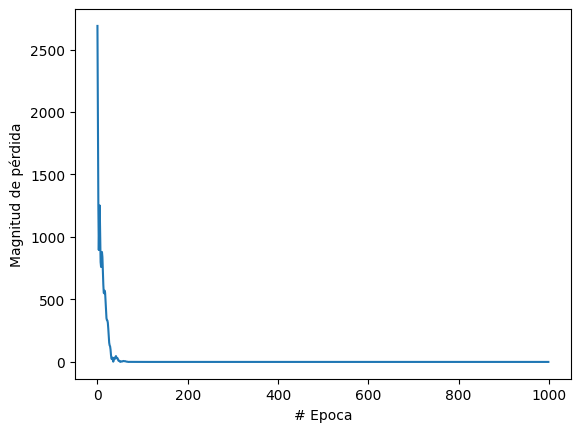

In [21]:
#La funcion de perdida dice que tan mal estan los resultados en cada vuelta que dio
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [22]:
print("Ahora la predicción")
resultado = modelo.predict([100.0])
print("El resultado es" + str(resultado)+"fahrenheit")

Ahora la predicción
1/1 [==============================] - 0s 107ms/step
El resultado es[[211.74744]]fahrenheit


In [23]:
print("Variables internas del modelo")
print(capa.get_weights())

Variables internas del modelo
[array([[1.7983263]], dtype=float32), array([31.90883], dtype=float32)]


In [24]:
print("Variables internas del modelo")
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[-0.30692828, -0.885425  , -0.1866313 ]], dtype=float32), array([ 2.7571735, -3.5676825, -3.328824 ], dtype=float32)]
[array([[-0.09276908, -1.2856096 ,  0.47657385],
       [-0.08453781,  1.3443224 , -0.6932296 ],
       [ 0.65331185,  0.3878676 , -0.7777725 ]], dtype=float32), array([-0.98106295, -3.546727  ,  3.3692698 ], dtype=float32)]
[array([[-0.25694484],
       [-1.0560985 ],
       [ 1.4303838 ]], dtype=float32), array([3.2956061], dtype=float32)]
